
기본 - 결정트리 (decision tree)

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier #의사결정 트리
from sklearn import metrics #정확도 구하는것

In [16]:
pima = pd.read_csv("diabetes.csv")
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [18]:
pima.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [0]:
# 데이터 셋 (feature와 target 변수로 나누기)
feature_cols=['Pregnancies', 'Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X=pima[feature_cols]
y=pima.Outcome

In [0]:
# 데이터 셋 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
print(X_test.columns)
print(X_train.columns)
print(y_train.shape)

Index(['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure',
       'DiabetesPedigreeFunction'],
      dtype='object')
Index(['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure',
       'DiabetesPedigreeFunction'],
      dtype='object')
(537,)


In [30]:
#의사 결정 트리 모델 생성
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#학습
clf=clf.fit(X_train, y_train)
#예측
y_pred=clf.predict(X_test)

print("Accuracy : ", metrics.accuracy_score(y_test, y_pred))


Accuracy :  0.7705627705627706


모델 평가

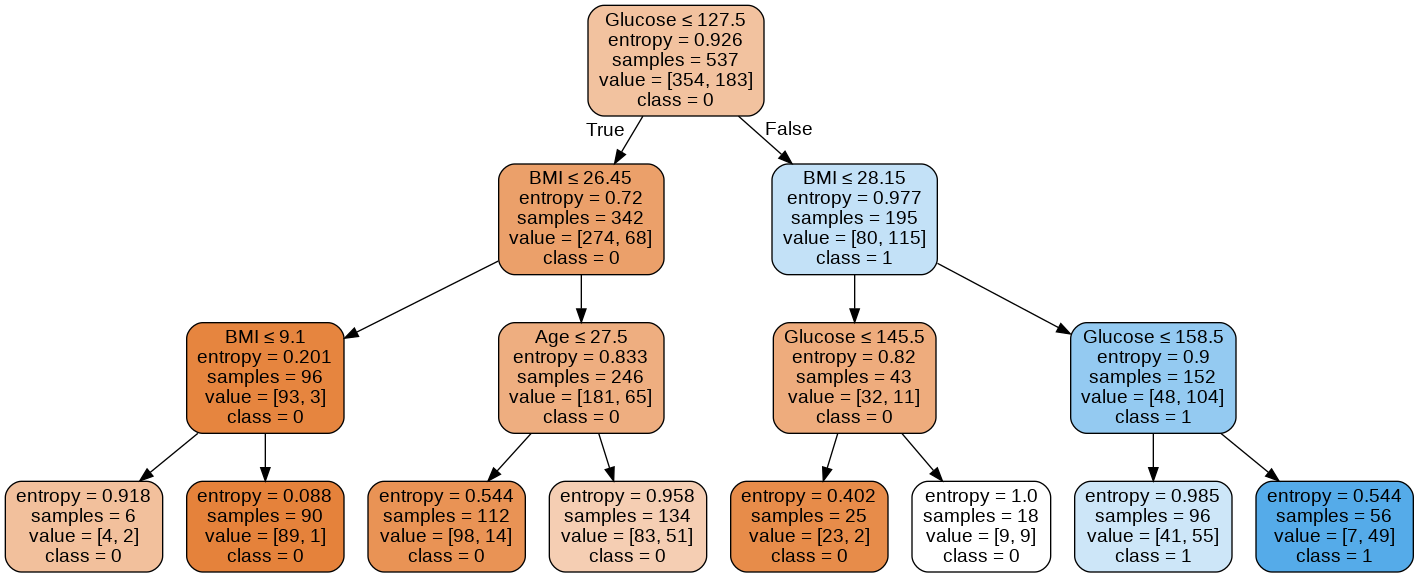

In [37]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())